## Pandas

<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/main/demos/Pandas%20Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Pandas is a Data Manipulaiton Library hat makes it easy to handle complex datasets.

Creating a DataFrame by passing a NumPy array, with labeled columns:

In [1]:
import pandas as pd
import numpy as np
#df=pd.read_csv("../datasets/melb_data.csv")
#df[df.isnull().any(axis=1)].iloc[-5:,14:17]

df = pd.DataFrame(np.random.randn(6, 4),  columns=list("ABCD"))

The columns of the resulting DataFrame have different dtypes.

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:



In [2]:
df.dtypes

,0
A,float64
B,float64
C,float64
D,float64


## Viewing data
df.head()
df.tail(3)
df.describe()
df.sort_values(by="B")
df.sort_index(axis=1, ascending=False)

## Selecting Data

In [7]:
print(df["A"])

print(df.iloc[3:5, 0:2] )#selection by index

0    1.098698
1   -0.900075
2   -1.521487
3    1.229457
4   -1.002408
5    0.538859
Name: A, dtype: float64
          A         B
3  1.229457  0.216682
4 -1.002408  0.977975


## Boolean indexing

In [8]:
print(df[df > 0])


          A         B         C         D
0  1.098698  0.472038       NaN  0.178079
1       NaN       NaN       NaN       NaN
2       NaN  1.116656       NaN  0.930151
3  1.229457  0.216682  0.872361  0.160623
4       NaN  0.977975       NaN  0.051173
5  0.538859  0.465548  0.167136       NaN


In [10]:
df.iloc[1,1] = "Hello"

df[df.isin(["Hello", "World"])]

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,Hello,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


## Task1: Missing data
In the following Dataframe, some data is missing. Find a way to:
* 1: Remove the column containing the missing data
* 2:  Fill the missing column with the average of each row

In [6]:

df1 = df.reindex( columns=list(df.columns) + ["E"])
df1

# Task 2.1: Plotting

The variable *ts* below contains a randomly generated "time series" a dataset in which time is one of the axies.

* Calculate the **cumulative sum** of this series in a new series. The cumulative sum at index *i* is the sum of all entries in *ts* up until index *i*.
* Plot the cumulative sum using *matplotlib*

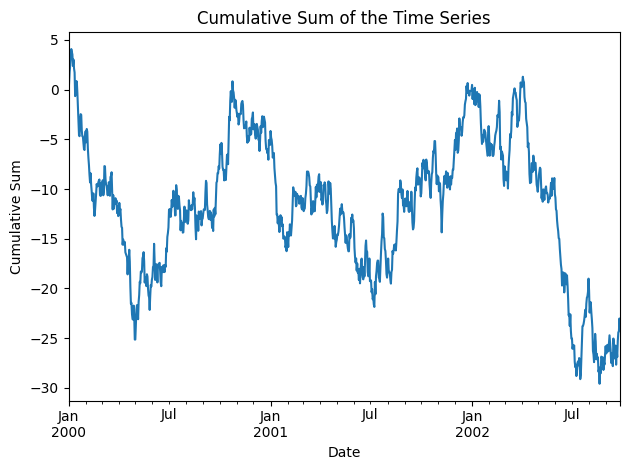

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate the time series
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

# Calculate the cumulative sum
cs = ts.cumsum()

# Plot the cumulative sum
plt.figure()
cs.plot()
plt.title("Cumulative Sum of the Time Series")
plt.xlabel("Date")
plt.ylabel("Cumulative Sum")
plt.tight_layout()
plt.show()



# Task 2.2:  

Adapt the code above to plot 4 timeseries in the same plot, with A different colour and label for each timeseries.\
The output should look similar to this:\
![ ](..\img\output_2_2.png)

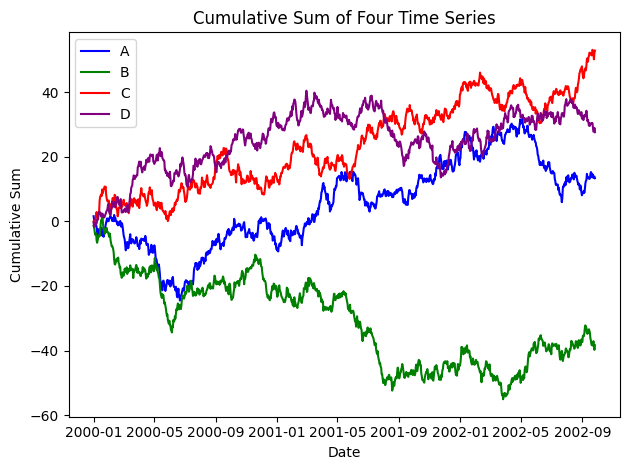

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate 4 random time series
ts_df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=pd.date_range("1/1/2000", periods=1000),
    columns=["A", "B", "C", "D"]
)

# Compute cumulative sum for each series
cs_df = ts_df.cumsum()

# Plot all four cumulative sums in the same figure
plt.figure()
colors = ["blue", "green", "red", "purple"]
for col, color in zip(cs_df.columns, colors):
    plt.plot(cs_df.index, cs_df[col], label=col, color=color)

plt.title("Cumulative Sum of Four Time Series")
plt.xlabel("Date")
plt.ylabel("Cumulative Sum")
plt.legend()
plt.tight_layout()
plt.show()
